### Equation Explanation

We are simulating the membrane potential of a neuron over multiple time steps using an exponential decay model. The equation governing the membrane potential \( V_t \) at time step \( t \) is given by:

\[
V_t = V_0 e^{-\frac{t}{\tau}} + \sum_{s=0}^{t} I_s e^{-\frac{t-s}{\tau}}
\]

Where:
- \( V_t \) is the membrane potential at time step \( t \),
- \( V_0 \) is the initial membrane potential at \( t = 0 \),
- \( \tau \) is the time constant governing the rate of exponential decay,
- \( I_s \) is the input current applied at previous time step \( s \),
- \( e^{-\frac{t-s}{\tau}} \) is the exponential decay factor that reduces the influence of previous inputs over time.

In this model:
1. **The first term** \( V_0 e^{-\frac{t}{\tau}} \) represents the exponential decay of the initial potential over time.
2. **The second term** \( \sum_{s=0}^{t} I_s e^{-\frac{t-s}{\tau}} \) accumulates the decayed contributions of all previous input currents.

The convolution operation allows us to compute the sum of decayed inputs efficiently for all time steps.

### Summary of the Vectorized Process

1. **Time vector**: We treat all time steps \( t = [0, 1, 2, 3] \) as a single vector.

2. **Exponential decay**: We apply the exponential decay function to the entire vector at once, computing \( V_0 e^{-\frac{t}{\tau}} \) for all time steps.

3. **Convolution for inputs**: We use convolution to efficiently compute the contribution of the input current at each time step, again without explicit iteration.

4. **Summing**: We sum the decayed initial potential and the decayed input current vectors element-wise to obtain the potential at each time step simultaneously.


## Vectorized Decay

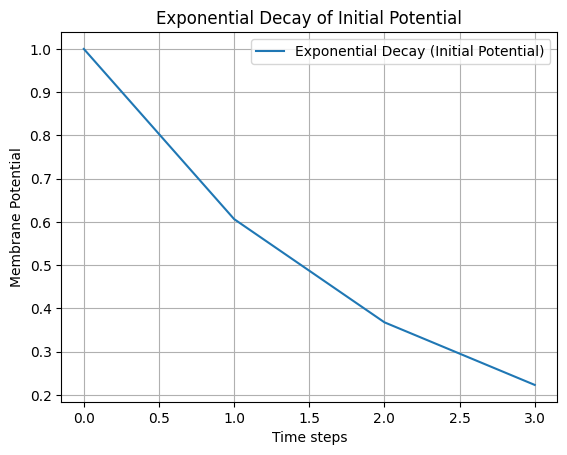

,Time,V_decay
0,0,1.000000
1,1,0.606531
2,2,0.367879
3,3,0.223130


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
tau = 2  # Time constant for decay
V_0 = 1  # Initial potential
T = 4    # Number of time steps

# Time vector
t = np.arange(T)

# Exponential decay for the initial potential
V_decay = V_0 * np.exp(-t / tau)

# Plot the decay of the initial potential
plt.plot(t, V_decay, label="Exponential Decay (Initial Potential)")
plt.xlabel("Time steps")
plt.ylabel("Membrane Potential")
plt.title("Exponential Decay of Initial Potential")
plt.grid(True)
plt.legend()
plt.show()

# Display the decay values
import pandas as pd
df_decay = pd.DataFrame({"Time": t, "V_decay": V_decay})
df_decay

## Vectoried Input

In [5]:
# Example: Define a non-constant input current vector
I_t = np.array([0.5, 0.3, 0.7, 0.2])  # Input current changes at each time step

# Display the non-constant input current vector
df_input = pd.DataFrame({"Time": t, "Non-constant Input Current (I_t)": I_t})
df_input

,Time,Non-constant Input Current (I_t)
0,0,0.5
1,1,0.3
2,2,0.7
3,3,0.2


## Exponential Decay Filter

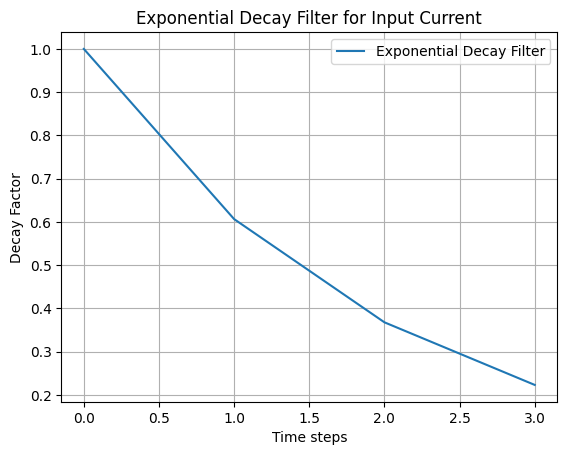

,Time,Decay Filter
0,0,1.000000
1,1,0.606531
2,2,0.367879
3,3,0.223130


In [6]:
# Exponential decay filter for input current
decay_filter = np.exp(-t / tau)

# Plot the exponential decay filter
plt.plot(t, decay_filter, label="Exponential Decay Filter")
plt.xlabel("Time steps")
plt.ylabel("Decay Factor")
plt.title("Exponential Decay Filter for Input Current")
plt.grid(True)
plt.legend()
plt.show()

# Display the decay filter
df_filter = pd.DataFrame({"Time": t, "Decay Filter": decay_filter})
df_filter

## Convolution to get decayed input contribution

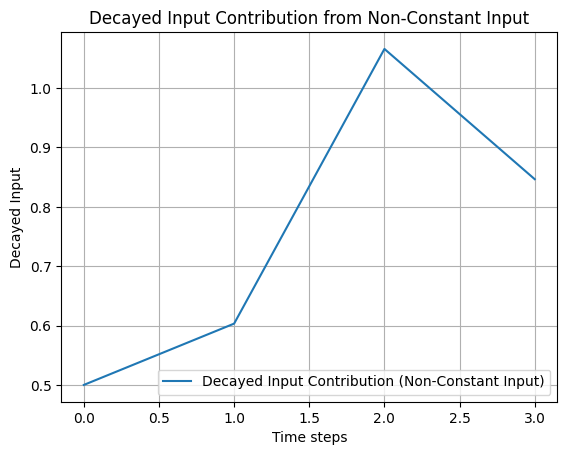

,Time,Decayed Input (I_decay)
0,0,0.500000
1,1,0.603265
2,2,1.065899
3,3,0.846500


In [7]:
# Perform convolution to sum decayed non-constant input currents
I_decay = np.convolve(I_t, decay_filter, mode='full')[:T]  # Truncate to T time steps

# Plot the decayed input contribution
plt.plot(t, I_decay, label="Decayed Input Contribution (Non-Constant Input)")
plt.xlabel("Time steps")
plt.ylabel("Decayed Input")
plt.title("Decayed Input Contribution from Non-Constant Input")
plt.grid(True)
plt.legend()
plt.show()

# Display the decayed input contributions
df_input_decay = pd.DataFrame({"Time": t, "Decayed Input (I_decay)": I_decay})
df_input_decay

## The Convolution Represents the Accumulation of Decayed Inputs

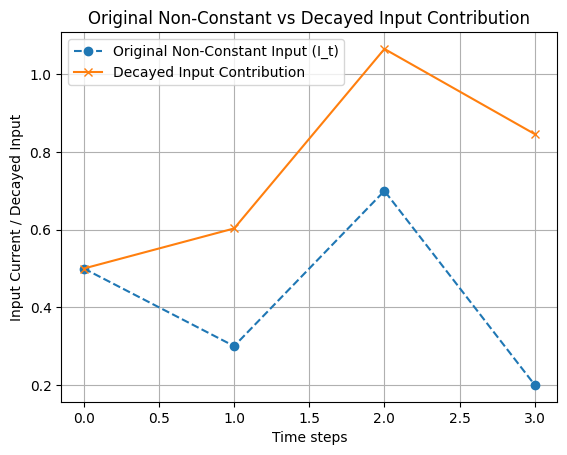

,Time,Original Input,Corrected Decayed Input
0,0,0.5,0.500000
1,1,0.3,0.603265
2,2,0.7,1.065899
3,3,0.2,0.846500


In [9]:
# Use the non-constant input current as defined earlier
I_t = np.array([0.5, 0.3, 0.7, 0.2])  # Non-constant input current

# Perform convolution to sum decayed non-constant input currents (cumulative effect)
I_decay_corrected = np.convolve(I_t, decay_filter, mode='full')[:T]  # Truncate to T time steps

# Plot the corrected decayed input contribution alongside the original non-constant input current
plt.plot(t, I_t, label="Original Non-Constant Input (I_t)", marker='o', linestyle='--')
plt.plot(t, I_decay_corrected, label="Decayed Input Contribution", marker='x')
plt.xlabel("Time steps")
plt.ylabel("Input Current / Decayed Input")
plt.title("Original Non-Constant vs Decayed Input Contribution")
plt.grid(True)
plt.legend()
plt.show()

# Display the corrected values in a table for clarity
df_input_contribution_corrected = pd.DataFrame({"Time": t, "Original Input": I_t, "Corrected Decayed Input": I_decay_corrected})
df_input_contribution_corrected

## Total Membrane Potential With Corrected Decayed Input Contribution

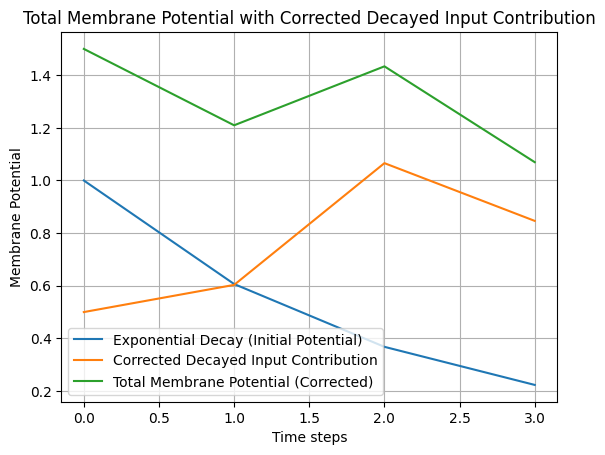

,Time,V_decay,Corrected I_decay,V_total
0,0,1.000000,0.500000,1.500000
1,1,0.606531,0.603265,1.209796
2,2,0.367879,1.065899,1.433778
3,3,0.223130,0.846500,1.069631


In [10]:
# Total membrane potential (initial potential + input contribution with corrected decayed input)
V_total_corrected = V_decay + I_decay_corrected

# Plot total membrane potential (with corrected decayed input)
plt.plot(t, V_decay, label="Exponential Decay (Initial Potential)")
plt.plot(t, I_decay_corrected, label="Corrected Decayed Input Contribution")
plt.plot(t, V_total_corrected, label="Total Membrane Potential (Corrected)")
plt.xlabel("Time steps")
plt.ylabel("Membrane Potential")
plt.legend()
plt.title("Total Membrane Potential with Corrected Decayed Input Contribution")
plt.grid(True)
plt.show()

# Display the total membrane potential in a table
df_total_corrected = pd.DataFrame({"Time": t, "V_decay": V_decay, "Corrected I_decay": I_decay_corrected, "V_total": V_total_corrected})
df_total_corrected
